In [49]:
import numpy as np
import math
import itertools
from rl.returns import returns
import rl.markov_process as mp
from typing import Iterable, Iterator, Tuple, TypeVar, Dict
from rl.distribution import Choose
from IPython.display import clear_output
import matplotlib.pyplot as plt

## Write a function mc_tabular for Tabular MC Prediction. Learining rate = $1/n$

In [50]:
S = TypeVar('S')
A = TypeVar('A')
def mc_tabular(traces: Iterable[Iterable[mp.TransitionStep[S]]],
        γ: float,
        tolerance: float = 1e-6)->Dict[S, Iterable[float]]:
    values_function = {}
    count = {}
    temp = 0
    for trace in traces:
        temp += 1

        if temp%100 == 0:
            print(temp)
        clear_output(wait=True)
        return_step = returns(trace, γ, tolerance)
        for step in return_step:
            if step.state in values_function.keys():
                count[step.state] += 1
                values_function[step.state] += [values_function[step.state][-1]+1/count[step.state]*(step.return_ - values_function[step.state][-1])]
            else:
                count[step.state] = 1
                values_function[step.state] = [step.return_]
    return values_function

## Import Simple Inventory MRP(code from text book).

In [51]:
from rl.chapter2.simple_inventory_mrp import SimpleInventoryMRPFinite
user_capacity = 2
user_poisson_lambda = 1.0
user_holding_cost = 1.0
user_stockout_cost = 10.0
user_gamma = 0.9

si_mrp = SimpleInventoryMRPFinite( capacity=user_capacity,
                                   poisson_lambda=user_poisson_lambda,
                                   holding_cost=user_holding_cost,
                                   stockout_cost=user_stockout_cost
)
si_mrp.display_value_function(gamma=user_gamma)


{InventoryState(on_hand=0, on_order=2): -28.345,
 InventoryState(on_hand=1, on_order=0): -28.932,
 InventoryState(on_hand=1, on_order=1): -29.345,
 InventoryState(on_hand=2, on_order=0): -30.345,
 InventoryState(on_hand=0, on_order=0): -35.511,
 InventoryState(on_hand=0, on_order=1): -27.932}


## Predict Value Fuctions with MC.

In [52]:
# code from text book
traces = si_mrp.reward_traces(Choose(set(si_mrp.non_terminal_states)))
niter = 100000
traces = itertools.islice(traces,niter)
values = mc_tabular(traces, user_gamma)

100000


In [53]:
for state in values.keys():
    print(str(state)+": "+str(values[state][-1]))

InventoryState(on_hand=0, on_order=0): -35.505511315933475
InventoryState(on_hand=0, on_order=2): -28.339601058337614
InventoryState(on_hand=1, on_order=0): -28.93273439316319
InventoryState(on_hand=0, on_order=1): -27.935342769723796
InventoryState(on_hand=1, on_order=1): -29.346150916964074
InventoryState(on_hand=2, on_order=0): -30.346465581643994


## Show RMSE of MC respective to MRP as a function of episode numbers.

Text(0, 0.5, 'Valution Function RMSE')

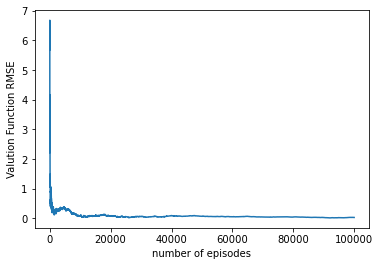

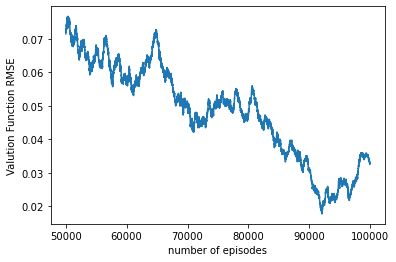

In [54]:
ground_truth ={si_mrp.non_terminal_states[i]: round(v, 3)
            for i, v in enumerate(si_mrp.get_value_function_vec(user_gamma))}
rmse = []
for k in range(niter):
    temp = 0
    for state in values.keys():
        temp += (values[state][k]-ground_truth[state])**2
    temp **= 1/2
    rmse += [temp]
xx = range(niter)
plt.figure()
plt.plot(rmse)
plt.xlabel('number of episodes')
plt.ylabel('Valution Function RMSE')
plt.figure()
plt.plot(xx[niter//2:niter],rmse[niter//2:niter])
plt.xlabel('number of episodes')
plt.ylabel('Valution Function RMSE')

